In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline

In [8]:
cs_2 = read_customer_data().pipe(standardize).pipe(dup).pipe(fill_null)
cs_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

# Cleaning with functions

In [4]:
#reading date:

def read_customer_data():
    return pd.read_csv("./Data_Marketing_Customer_Analysis_Round2.csv")

In [5]:
#standardizing column names:

def standardize(cs_2):
    new_columns = cs_2.columns.str.lower().str.replace(" ", "_")
    cs_2.columns = new_columns
    return cs_2

In [6]:
#duplicates

def dup(cs_2):
    cs_2 = cs_2.drop_duplicates().reset_index()
    cs_2.drop(columns=["index"], inplace=True)
    return cs_2

In [7]:
#Replacing null values ->mean
def fill_null(cs_2):
    cs_2["number_of_open_complaints"] = cs_2["number_of_open_complaints"].fillna(value=0)
    mean_months = round(cs_2["months_since_last_claim"].mean())
    cs_2["months_since_last_claim"] = cs_2["months_since_last_claim"].fillna(value=mean_months)
    mean_income = round(cs_2["income"].mean())
    cs_2["income"] = cs_2["income"].fillna(value=mean_income)
    return cs_2

## Activity 2

In [9]:
# bucketing data state groups

def state_group(x):
    
    #nan values
    if not x==x:
        return x
    else:
        dct_ = {"Washington":"west_coast" ,
                "Arizona": "midwest" ,
                "Nevada": "west_coast" ,
                "California": "west_coast" ,
                "Oregon": "west_coast" ,
               }
        return dct_[x]


cs_2["state"] = cs_2["state"].apply(state_group)

In [10]:
cs_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

## Activity 3

In [11]:
cs_2["effective_to_date"]

0        2/18/11
1        1/18/11
2        2/10/11
3        1/11/11
4        1/17/11
          ...   
10905    1/19/11
10906     1/6/11
10907     2/6/11
10908    2/13/11
10909     1/8/11
Name: effective_to_date, Length: 10910, dtype: object

In [13]:

#set to datetime set

cs_2["effective_to_date"] = pd.to_datetime(cs_2["effective_to_date"])

In [ ]:
cs_2["month"]=list(map(lambda date:date.strftime (format=%B),df["date"]))

In [ ]:
cs_2["effective to date"]

In [16]:
#store in new column month

cs_2["month"] = pd.DatetimeIndex(cs_2["effective_to_date"]).month

In [ ]:
#show information of first quarter

In [17]:
cs_2["month"].unique() 

#no march

array([2, 1])

In [18]:
# filter data to show information of first quarter

cs_2.month.describe()

count    10910.000000
mean         1.466728
std          0.498915
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: month, dtype: float64

In [19]:
cs_2[cs_2["month"] >=2] #data first quarter

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,midwest,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
2,2,LZ68649,west_coast,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2011-02-14,Employed,M,...,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,2
6,6,IW72280,west_coast,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN,2
7,7,IH64929,west_coast,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,...,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,10899,WU60905,west_coast,8610.667489,No,Basic,High School or Below,2011-02-06,Unemployed,F,...,9,Corporate Auto,Corporate L1,Offer3,Web,532.800000,SUV,Medsize,A,2
10900,10900,VN73653,west_coast,6423.739052,No,Basic,College,2011-02-13,Unemployed,M,...,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury SUV,Medsize,NaN,2
10904,10904,QI63521,west_coast,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10907,10907,TL39050,midwest,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2


# Activty 4 Plotting

## Plot: Number of responses

In [20]:
# Number of responses:

number_of_response=cs_2["response"].value_counts()
number_of_response

No     8813
Yes    1466
Name: response, dtype: int64

<AxesSubplot:title={'center':'Number of responses'}, ylabel='response'>

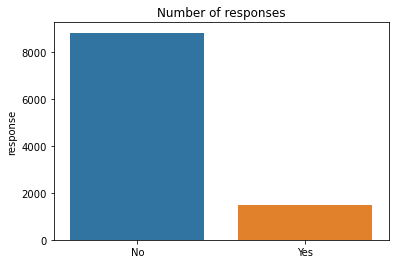

In [21]:
fig1, ax1 = plt.subplots()
ax1.set_title("Number of responses")

sns.barplot(x=number_of_response.index ,y =number_of_response)


## Plot: Response rate by channel

In [23]:
response_rate= cs_2.groupby(["sales_channel",'response']).size().reset_index(name="Count")


In [24]:
response_rate

,sales_channel,response,Count
0,Agent,No,3148
1,Agent,Yes,742
2,Branch,No,2539
3,Branch,Yes,326
4,Call Center,No,1792
5,Call Center,Yes,221
6,Web,No,1334
7,Web,Yes,177


<AxesSubplot:title={'center':'Response rate by channel'}, xlabel='response', ylabel='Count'>

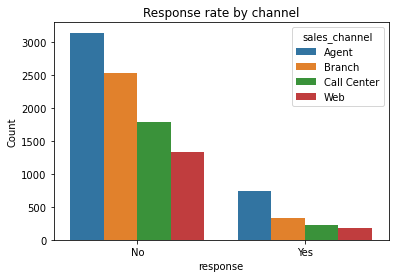

In [26]:
fig2, ax2 =plt.subplots ()

ax2.set_title("Response rate by channel")

sns.barplot(x=response_rate["response"], y=response_rate["Count"], hue= response_rate["sales_channel"])

## Plot: response rate by the total claim amount

In [27]:
response_total_claim=cs_2.groupby(["total_claim_amount", "response"]).size().reset_index()


In [28]:
response_total_claim

,total_claim_amount,response,0
0,0.099007,No,1
1,0.382107,No,2
2,0.423310,No,2
3,0.517753,No,1
4,0.769185,No,1
...,...,...,...
5161,2345.413441,No,1
5162,2452.894264,No,1
5163,2552.343856,No,2
5164,2759.794354,No,1


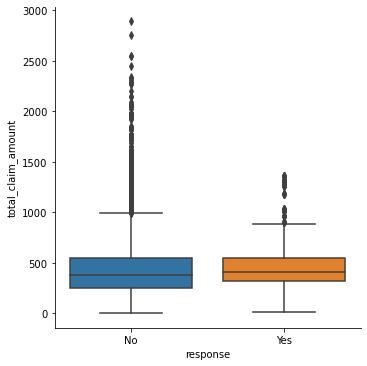

In [30]:
sns.catplot(x='response', y='total_claim_amount', data = cs_2, kind= "box")


## Plot: Response rate by income.

In [ ]:
response_income=cs_2.groupby(["response"]).count()["income"].reset_index()

In [ ]:
response_income

In [ ]:
tips = sns.load_dataset("tips")

g = sns.lmplot(x="total_bill", y="tip", data=tips)

In [ ]:
##Correlation Heatmap.